In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

loans_base_df = pd.read_csv("loan_merged.csv",parse_dates=[3,10,17,18,58])

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_var = ['amount_order','k_symbol_LEASING',
            'k_symbol_Other', 'k_symbol_POJISTNE',
            'k_symbol_SIPO', 'k_symbol_UVER','amount_sum',
            'amount_mean', 'amount_std', 
            'balance_min', 'balance_max', 'balance_mean', 'balance_std',
            'type_PRIJEM_sum', 'type_VYBER_sum',
            'type_VYDAJ_sum', 'operation_Other_sum', 'operation_PREVOD NA UCET_sum',
            'operation_PREVOD Z UCTU_sum', 'operation_VKLAD_sum',
            'operation_VYBER_sum', 'operation_VYBER KARTOU_sum',
            'k_symbol_DUCHOD_sum', 'k_symbol_Other_sum', 'k_symbol_POJISTNE_sum',
            'k_symbol_SANKC. UROK_sum', 'k_symbol_SIPO_sum', 'k_symbol_SLUZBY_sum',
            'k_symbol_UROK_sum', 'k_symbol_UVER_sum', 'A4', 'A5', 'A6', 'A7', 'A8',
            'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']

ord_var = ['gender','frequency','type_y']
date_var = ['date_x','date_y', 'date_min', 'date_max','birth_date']
drop_var = ['account_id','district_id','type_x','issued']
pass_var = ['amount','duration','payments','loan_id']

target_raw = loans_base_df['status']
target_raw[(target_raw == 'A') | (target_raw == 'C')] = 1
target_raw[(target_raw == 'B')  | (target_raw == 'D')] = 0
#Build a column transforrner

numeric_transformer = SimpleImputer(missing_values = np.nan, strategy='median')
  
binary_transformer = OneHotEncoder(handle_unknown='ignore')

#date_transformer = 

ordinal_transformer = OneHotEncoder(categories  = [ ['M','F'],
                                                     ['POPLATEK PO OBRATU','POPLATEK TYDNE','POPLATEK MESICNE'],
                                                     ['No Card','junior','classic','gold']])

preprocessor = ColumnTransformer(transformers = [ ('numerical', numeric_transformer, num_var),
                                                  ('ordinal',ordinal_transformer, ord_var),
                                                  ('pass','passthrough', pass_var+date_var)],
                                                  #('date','passthrough', date_var)],
                                                   remainder = 'drop')

X = loans_base_df.drop(columns = 'status')
#y = target_raw 

#X['status'] = y.astype(bool)

X_transformed = preprocessor.fit_transform(X)


ord_var_list = ['M','F'] +  ['POPLATEK PO OBRATU','POPLATEK TYDNE','POPLATEK MESICNE'] + ['No Card','junior','classic','gold']

transformed_columns = num_var +  ord_var_list + pass_var + date_var # + date_var

#print(X_train_transformed.shape)
#print(len(transformed_columns))

X_transform_df = pd.DataFrame(X_transformed, columns = transformed_columns)

X_transform_df['status'] = target_raw




/home/dan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/dan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [50]:
loans_base_df = pd.read_csv("loan_merged.csv")
loans_base_df['status']

X_transform_df['status_type'] = loans_base_df['status']

X_transform_df.head()



,amount_order,k_symbol_LEASING,k_symbol_Other,k_symbol_POJISTNE,k_symbol_SIPO,k_symbol_UVER,amount_sum,amount_mean,amount_std,balance_min,balance_max,balance_mean,balance_std,type_PRIJEM_sum,type_VYBER_sum,type_VYDAJ_sum,operation_Other_sum,operation_PREVOD NA UCET_sum,operation_PREVOD Z UCTU_sum,operation_VKLAD_sum,operation_VYBER_sum,operation_VYBER KARTOU_sum,k_symbol_DUCHOD_sum,k_symbol_Other_sum,k_symbol_POJISTNE_sum,k_symbol_SANKC. UROK_sum,k_symbol_SIPO_sum,k_symbol_SLUZBY_sum,k_symbol_UROK_sum,k_symbol_UVER_sum,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,M,F,POPLATEK PO OBRATU,POPLATEK TYDNE,POPLATEK MESICNE,No Card,junior,classic,gold,amount,duration,payments,loan_id,date_x,date_y,date_min,date_max,birth_date,status,status_type
0,10638.7,0,0,0,7266,3372.7,3.15151e+06,6593.13,7694.52,1100,69302,36540.8,11028.2,1.59706e+06,217442,1.33702e+06,10719,553242,1.53794e+06,48400,1.00122e+06,0,0,2.58658e+06,0,0,472290,975,10719,80952,1.20495e+06,0,0,0,1,1,100,12541,0.2,0.43,167,85677,99107,1,0,0,0,1,1,0,0,0,80952,24,3373,4959,1994-01-05,1993-02-26,1993-02-26,1998-12-31,1945-02-04,1,A
1,2523.2,0,0,0,0,2523.2,1.57553e+06,5199.78,6866.58,-10605,58158,16253.1,12127.9,793196,32194,750142,5589,20184,741807,45800,762152,0,0,1.0681e+06,0,58,481000,600,5589,20184,103347,87,16,7,1,7,67,9104,1.5,2.07,123,2299,2354,0,1,0,0,1,1,0,0,0,30276,12,2523,4961,1996-04-29,1995-04-07,1995-04-07,1998-12-31,1939-04-23,0,B
2,10614.2,0,1110,164,6817,2523.2,2.95856e+06,10797.6,15178.2,900,134210,56279.2,24090.9,1.49438e+06,85758,1.37842e+06,6203,248733,0,1.48817e+06,1.21545e+06,0,0,2.7332e+06,4428,0,184059,390,6203,30276,228848,15,40,18,2,6,57.2,9893,4,4.72,96,5623,5887,1,0,0,0,1,1,0,0,0,30276,12,2523,4962,1997-12-08,1996-07-28,1996-07-28,1998-12-31,1962-02-09,1,A
3,10305.5,0,2584,97,2317,5307.5,948159,7293.53,11915.5,-1011,104762,37547.5,23823.4,497029,41655,409475,2535,75280,0,494494,375850,0,0,906325,1358,0,32438,195,2535,5308,70646,94,14,3,1,4,58.4,8547,2.6,3.64,120,1563,1542,1,0,0,0,1,1,0,0,0,318480,60,5308,4967,1998-10-14,1997-08-18,1997-08-18,1998-12-31,1952-08-26,0,D
4,9666.8,0,231,228,6901,2306.8,571952,4399.63,5450.45,13841,55991,34462.4,9455.33,308266,37819,225867,2506,107007,256060,49700,156679,0,0,465082,2736,0,82812,360,2506,18456,51428,50,11,3,1,4,52.7,8402,3.1,3.98,120,999,1099,0,1,0,1,0,1,0,0,0,110736,48,2307,4968,1998-04-19,1997-08-08,1997-08-08,1998-12-31,1940-01-30,1,C


In [21]:
#Number of loans

num_comp_loans = X_transform_df['status'].sum()

num_ncomp_loans = X_transform_df.shape[0] - num_comp_loans

print(num_comp_loans/X_transform_df.shape[0],num_ncomp_loans/X_transform_df.shape[0])


0.8885630498533724 0.11143695014662756


In [64]:
#Value of Loans

loans_base_df = pd.read_csv("loan_merged.csv",parse_dates=[1])

#What is dataset current date.... December 31st, 1998 

A_loans = X_transform_df[X_transform_df['status_type']=='A']
C_loans = X_transform_df[X_transform_df['status_type']=='C']

B_loans = X_transform_df[X_transform_df['status_type']=='B']
D_loans = X_transform_df[X_transform_df['status_type']=='D']

#date_x is loan date
#date_y is account creation date


In [ ]:
# Find amount paid and amount remaining

#Type A
#Amount paid = amount
#Amount remaining = 0

#Type C
#Amount paid = Months passed since start * payments
#Amount remaining = Amount - Amount paid

#B' stands for contract finished, loan not payed,


#D' stands for running contract, client in debt

In [61]:
pd.set_option('display.max_rows',100)
print(loans_base_df.loc[5])

Unnamed: 0                                                  5
loan_id                                                  4973
account_id                                                 67
date_x                          1996-05-02T00:00:00.000000000
amount                                                 165960
duration                                                   24
payments                                                 6915
status                                                      A
district_id                                                16
frequency                                    POPLATEK MESICNE
date_y                          1994-10-19T00:00:00.000000000
amount_order                                            13753
k_symbol_LEASING                                            0
k_symbol_Other                                            445
k_symbol_POJISTNE                                           0
k_symbol_SIPO                                            6393
k_symbol

In [ ]:
percent_paid = 100*(A_loans['k_symbol_UVER_sum'] / A_loans['amount'])

A_loans['percent_paid'] = percent_paid
A_info = A_loans[['status_type','date_x','amount','duration','payments','k_symbol_UVER_sum','percent_paid']]
A_info.head()

In [79]:
print( A_info['amount'].sum(), A_info['k_symbol_UVER_sum'].sum(), A_info['k_symbol_UVER_sum'].sum().A_info['amount'].sum()

18603216 18602306.0 0.9999510837265987


In [81]:
percent_paid = 100*(B_loans['k_symbol_UVER_sum'] / B_loans['amount'])

B_loans['percent_paid'] = percent_paid
B_info = B_loans[['status_type','date_x','amount','duration','payments','k_symbol_UVER_sum','percent_paid']]
B_info.head()

print( B_info['amount'].sum(), B_info['k_symbol_UVER_sum'].sum(), B_info['k_symbol_UVER_sum'].sum()/B_info['amount'].sum())

4362348 3350530.0 0.7680565603661148


/home/dan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
percent_paid = 100*(C_loans['k_symbol_UVER_sum'] / C_loans['amount'])

C_loans['percent_paid'] = percent_paid
C_info = C_loans[['status_type','date_x','amount','duration','payments','k_symbol_UVER_sum','percent_paid']]
C_info.head()

print( C_info['amount'].sum(), C_info['k_symbol_UVER_sum'].sum(), C_info['k_symbol_UVER_sum'].sum()/C_info['amount'].sum())


69078372 28891760.0 0.41824610458393546


/home/dan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [83]:
percent_paid = 100*(D_loans['k_symbol_UVER_sum'] / D_loans['amount'])

D_loans['percent_paid'] = percent_paid
D_info = D_loans[['status_type','date_x','amount','duration','payments','k_symbol_UVER_sum','percent_paid']]
D_info.head()

print( D_info['amount'].sum(), D_info['k_symbol_UVER_sum'].sum(), D_info['k_symbol_UVER_sum'].sum()/D_info['amount'].sum())

11217804 4408405.0 0.3929828868466591


/home/dan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


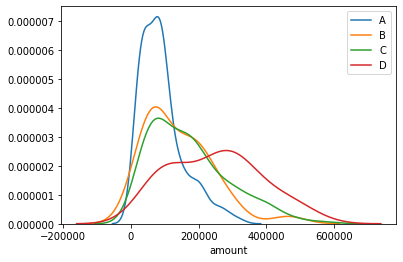

In [100]:
sns.distplot(A_info['amount'], hist=False, rug=False, label="A");
sns.distplot(B_info['amount'], hist=False, rug=False, label="B");
sns.distplot(C_info['amount'], hist=False, rug=False, label="C");
sns.distplot(D_info['amount'], hist=False, rug=False, label="D");
plt.legend();

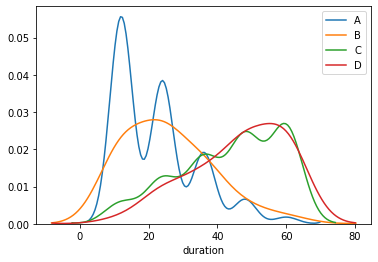

In [101]:
sns.distplot(A_info['duration'], hist=False, rug=False, label="A");
sns.distplot(B_info['duration'], hist=False, rug=False, label="B");
sns.distplot(C_info['duration'], hist=False, rug=False, label="C");
sns.distplot(D_info['duration'], hist=False, rug=False, label="D");
#plt.legend(['A','B','C','D']);

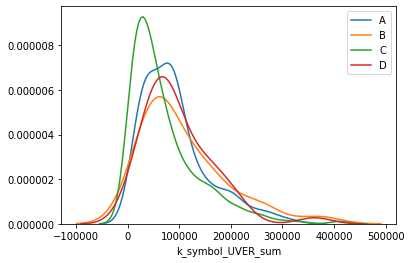

In [102]:
sns.distplot(A_info['k_symbol_UVER_sum'], hist=False, rug=False, label="A");
sns.distplot(B_info['k_symbol_UVER_sum'], hist=False, rug=False, label="B");
sns.distplot(C_info['k_symbol_UVER_sum'], hist=False, rug=False, label="C");
sns.distplot(D_info['k_symbol_UVER_sum'], hist=False, rug=False, label="D");

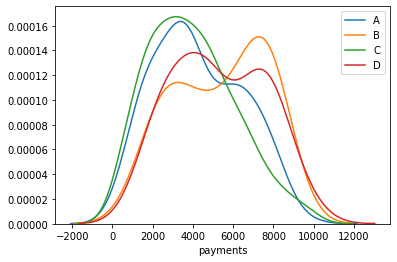

In [103]:
sns.distplot(A_info['payments'], hist=False, rug=False, label="A");
sns.distplot(B_info['payments'], hist=False, rug=False, label="B");
sns.distplot(C_info['payments'], hist=False, rug=False, label="C");
sns.distplot(D_info['payments'], hist=False, rug=False, label="D");

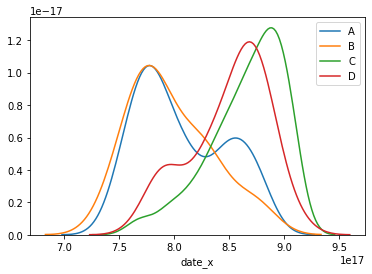

In [104]:
sns.distplot(A_info['date_x'], hist=False, rug=False, label="A");
sns.distplot(B_info['date_x'], hist=False, rug=False, label="B");
sns.distplot(C_info['date_x'], hist=False, rug=False, label="C");
sns.distplot(D_info['date_x'], hist=False, rug=False, label="D");

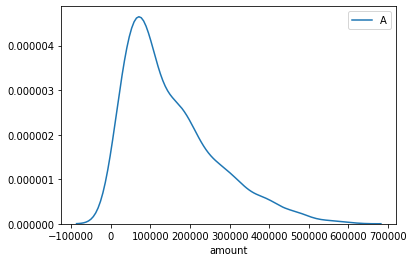

In [106]:
loans_base_df
sns.distplot(loans_base_df['amount'], hist=False, rug=False, label="A");

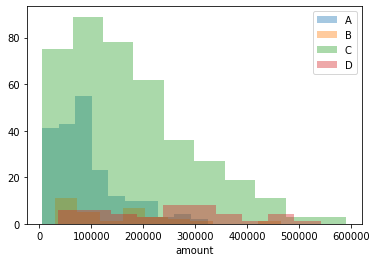

In [107]:
sns.distplot(A_info['amount'], kde=False, bins=10, rug=False, label="A");
sns.distplot(B_info['amount'], kde=False, bins=10, rug=False, label="B");
sns.distplot(C_info['amount'], kde=False, bins=10, rug=False, label="C");
sns.distplot(D_info['amount'], kde=False, bins=10, rug=False, label="D");
plt.legend();

In [108]:
loans_base_df['amount'].median()

116928.0

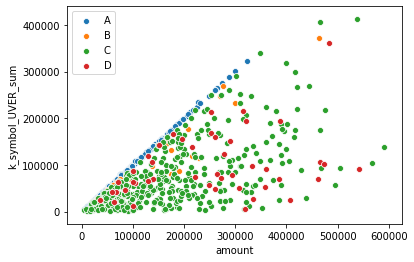

In [115]:
sns.scatterplot('amount','k_symbol_UVER_sum',data=A_info,label="A")
sns.scatterplot('amount','k_symbol_UVER_sum',data=B_info,label="B")
sns.scatterplot('amount','k_symbol_UVER_sum',data=C_info,label="C")
sns.scatterplot('amount','k_symbol_UVER_sum',data=D_info,label="D")
plt.legend();

In [127]:
loans_base_df[(600000<loans_base_df['amount']) & (loans_base_df['amount']<700000) ]['status'].value_counts()

Series([], Name: status, dtype: int64)

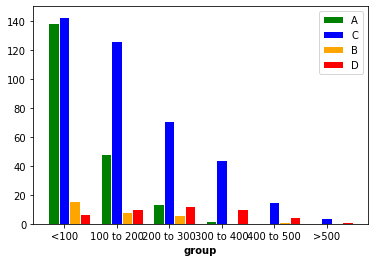

In [135]:
# set width of bar
barWidth = 0.20
 
# set height of bar
bars1 = [139,48,14,2,0,0]
bars2 = [16,8,6,0,1,0]
bars3 = [143,126,71,44,15,4]
bars4 = [7,10,12,10,5,1 ]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3] 
    
# Make the plot
plt.bar(r1, bars1, color='g', width=barWidth, edgecolor='white', label='A')
plt.bar(r2, bars3, color='b', width=barWidth, edgecolor='white', label='C')
plt.bar(r3, bars2, color='orange', width=barWidth, edgecolor='white', label='B')
plt.bar(r4, bars4, color='r', width=barWidth, edgecolor='white', label='D') 
    
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['<100', '100 to 200', '200 to 300', '300 to 400', '400 to 500','>500'])
 
# Create legend & Show graphic
plt.legend()
plt.show()
